# Our first real exercise with rdkit

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [24]:
m = Chem.MolFromSmiles("C(=O)c1ccccc1")

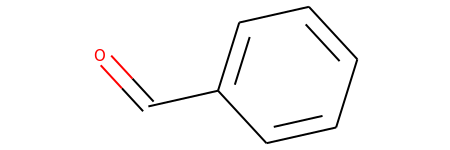

In [25]:
m

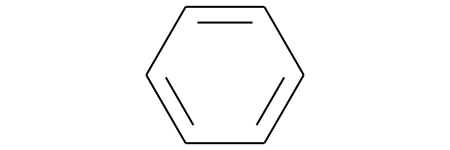

In [54]:
n = Chem.MolFromSmiles("c1ccccc1")
n

In [50]:
# almost same molecule
m1 = Chem.MolFromSmiles("c1ccccc1C(=O)")

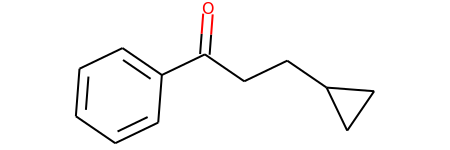

In [49]:
# completely different molecule
cdm = Chem.MolFromSmiles("c1ccccc1C(=O)CCC1CC1")
cdm

In [6]:
# compare
print(Chem.MolToSmiles(m), Chem.MolToSmiles(m1))
# with
print(Chem.MolToSmiles(m, canonical=False), Chem.MolToSmiles(m1, canonical=False))
# Do you remeber from lectures what cononical means?

O=Cc1ccccc1 O=Cc1ccccc1
C(=O)c1ccccc1 c1ccccc1C=O


In [7]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  8  3  1  0
M  END



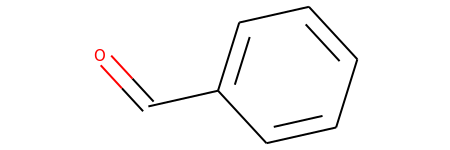

In [8]:
# rdkit can show your molecule (since 2019 without any manually added methods)
m

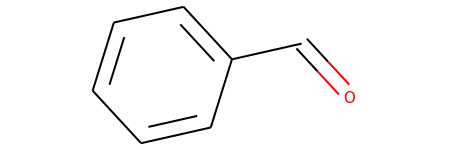

In [9]:
# looks almost the same, but different atom numbering
m1

## How to calculate all rings in drug bank?
Firstly, how can we work with rings

In [55]:
ri=m.GetRingInfo()
ri.AtomRings()

((2, 7, 6, 5, 4, 3),)

In [56]:
# can you see different ids of atoms in the ring?
ri=m1.GetRingInfo()
ri.AtomRings()

((0, 5, 4, 3, 2, 1),)

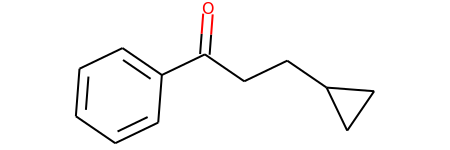

In [12]:
# advanced molecule
cdm

In [13]:
Chem.GetSSSR(m), Chem.GetSSSR(m1), Chem.GetSSSR(cdm)

(1, 1, 2)

In [16]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')  # Default working directory is where the notebook is
drugs = [m for m in suppl if not m == None]  # supplier sometimes returns None, you can see many errors below

#drugs = []
#for m in suppl:
#    drug.append(m)

RDKit ERROR: [16:36:13] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:36:13] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:36:13] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:36:13] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:36:13] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:36:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:36:13] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:36:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:36:13] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:36:13] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:36:13] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:36:13] Can't kek

RDKit ERROR: [16:36:14] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR: 
RDKit ERROR: [16:36:14] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [16:36:14] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [16:36:14] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [16:36:14] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [16:36:14] ERROR: Could not sanitize molecule ending on line 503342
RDKit ERROR: [16:36:14] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [16:36:14] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:36:14] ERROR: Could not sanitize molecule ending on line 508068
RDKit ERROR: [16:36:14] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:36:14] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 

We obtained so many drugs

In [17]:
len(drugs)

7113

With SSSR algorithm, we can calculate all rings

In [18]:
rings = [Chem.GetSSSR(drug) for drug in drugs]

In [19]:
rings[:10]

[6, 6, 4, 6, 1, 4, 5, 1, 12, 3]

In [20]:
[(m,r) for m, r in zip(drugs, rings[:10])]

[(<rdkit.Chem.rdchem.Mol at 0x7f042b21e490>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e4e0>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e530>, 4),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e580>, 6),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e5d0>, 1),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e620>, 4),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e670>, 5),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b46e850>, 1),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e6c0>, 12),
 (<rdkit.Chem.rdchem.Mol at 0x7f042b21e710>, 3)]

Sum of all rings give us

In [21]:
sum(rings)

17547

Average per compound

In [22]:
sum(rings)/len(drugs)

2.4668916069169127